In [1]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

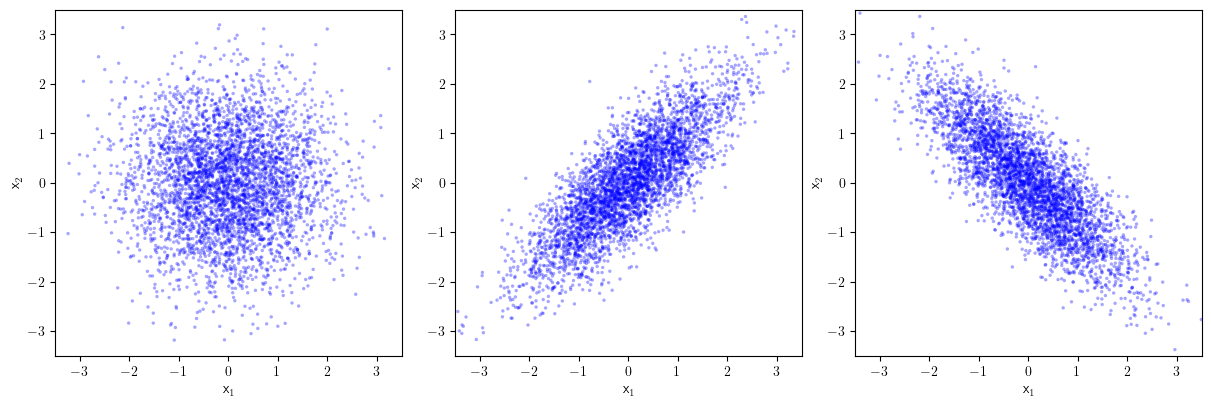

In [7]:
np.random.seed(42)
n = 4000
means = np.zeros(2)
sigmas = [
    np.array([[1.0,  0.0],  [0.0, 1.0]]),   # uncorrelated
    np.array([[1.0,  0.8],  [0.8, 1.0]]),   # positively correlated
    np.array([[1.0, -0.8],  [-0.8, 1.0]])   # negatively correlated
]
titles = [
    r"Uncorrelated: $\Sigma=\begin{bmatrix}1&0\\0&1\end{bmatrix}$",
    r"Positively corr.: $\Sigma=\begin{bmatrix}1&0.8\\0.8&1\end{bmatrix}$",
    r"Negatively corr.: $\Sigma=\begin{bmatrix}1&-0.8\\-0.8&1\end{bmatrix}$"
]

# --- samples ---
samples = [np.random.multivariate_normal(means, S, size=n) for S in sigmas]

# --- figure ---
fig, axes = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)
lims = (-3.5, 3.5)

for ax, xy, title in zip(axes, samples, titles):
    ax.scatter(xy[:, 0], xy[:, 1], s=6, alpha=0.35, edgecolors='none', color="blue")
    ax.set_xlim(lims); ax.set_ylim(lims)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel(r'$\mathsf{x}_1$') 
    ax.set_ylabel(r'$\mathsf{x}_2$')
    # ax.set_title(title, fontsize=10)

# fig.suptitle("Samples from 2D Gaussians with Different Covariances", y=1.02, fontsize=12)
fig.savefig("../../../figs/probability/covariance_panels.pdf", bbox_inches="tight", transparent=True)
plt.show(fig)

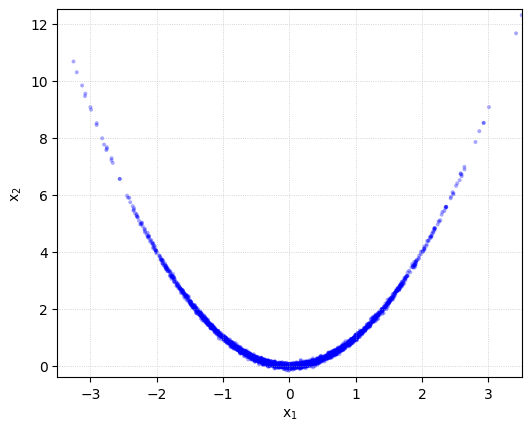

In [7]:
# figs/probability/make_uncorrelated_dependent.py
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

np.random.seed(7)

n = 3000
x = np.random.normal(0.0, 1.0, size=n)              # symmetric, zero mean
eps = 0.05 * np.random.normal(0.0, 1.0, size=n)     # small zero-mean noise, independent of x
y = x**2 + eps                                       # dependent but (theoretically) uncorrelated

# sample correlation just for the caption/title
rho_hat = np.corrcoef(x, y)[0, 1]

fig, ax = plt.subplots(figsize=(5.2, 4.2), constrained_layout=True)
ax.scatter(x, y, s=8, alpha=0.35, edgecolors='none', color="blue")
ax.set_xlabel(r'$\mathsf{x}_1$')
ax.set_ylabel(r'$\mathsf{x}_2$')
# ax.set_title(fr'Uncorrelated but dependent (sample corr $\approx$ {rho_hat:.03f})', fontsize=10)
ax.set_xlim(-3.5, 3.5)
ax.set_ylim(-0.4, 12.5)
ax.grid(True, ls=':', lw=0.6, alpha=0.7)

outpath = "../../../figs/probability/uncorrelated_dependent.pdf"
fig.savefig(outpath, bbox_inches="tight", transparent=True)
plt.show(fig)

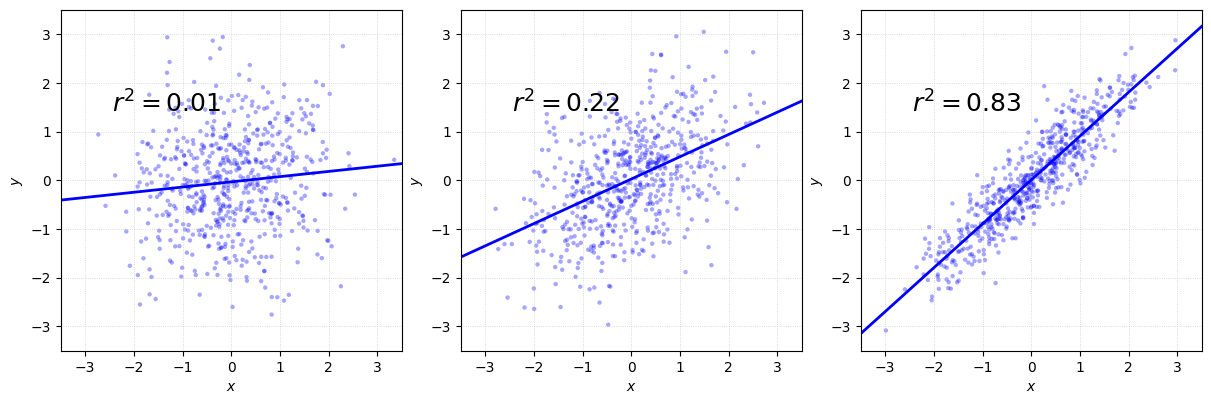

In [16]:
rhos = [0.1, 0.5, 0.9]
n = 600
means = np.zeros(2)

fig, axes = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)

lims_x = (-3.5, 3.5)
lims_y = (-3.5, 3.5)

for ax, rho in zip(axes, rhos):
    Sigma = np.array([[1.0, rho],
                      [rho, 1.0]])
    xy = np.random.multivariate_normal(means, Sigma, size=n)
    x = xy[:, 0]
    y = xy[:, 1]

    r = np.corrcoef(x, y)[0, 1]
    r2 = r**2

    a, b = np.polyfit(x, y, 1)
    xs = np.linspace(*lims_x, 200)
    ys = a*xs + b

    ax.scatter(x, y, s=10, alpha=0.35, edgecolors='none', color="blue")
    ax.plot(xs, ys, linewidth=2, color="blue")

    ax.set_xlim(lims_x); ax.set_ylim(lims_y)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel(r'$x$'); ax.set_ylabel(r'$y$')
    ax.grid(True, ls=':', lw=0.6, alpha=0.6)
    ax.annotate(fr'$r^2 = {r2:.2f}$',
                xy=(0.15, 0.7), xycoords='axes fraction', fontsize=18)

    # ax.set_title(fr'$\rho$ target {rho:.1f}  |  sample $r^2 \approx {r2:.2f}$', fontsize=10)

# fig.suptitle(r'Visualizing $r^2$: proportion of variance explained by a linear fit', y=1.02, fontsize=12)
outpath = "../../../figs/probability/r2_panels.pdf"
fig.savefig(outpath, bbox_inches="tight", transparent=True)
plt.show(fig)
